In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
import torch
import torch.nn as nn

/tmp/ipykernel_2541832/1189370658.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


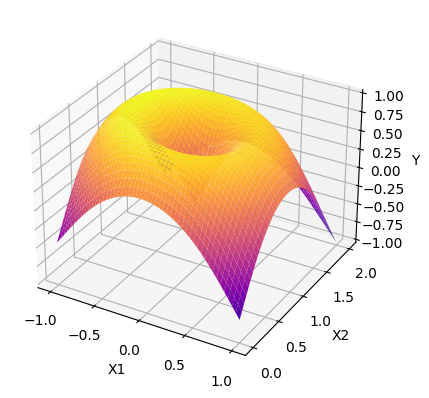

In [36]:
num_points = 50
# X1 = np.linspace(-2.5, 1.9, num_points)
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2.5, 3, num_points)
# X2 = np.linspace(-2.2, 2.1, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1. - 0.1*(X1)+0.02*(X2)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
X1,X2 = 1*X1, X2*1+1
# Y = -Y

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])

yy = torch.Tensor(Y.reshape(-1,1))
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [37]:
vector = torch.Tensor([[0, 1]])
vector /= torch.norm(vector)

In [38]:
## Simple dot product
yout = xx@vector.t()
yout.shape

torch.Size([2500, 1])

/tmp/ipykernel_2541832/2459103546.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


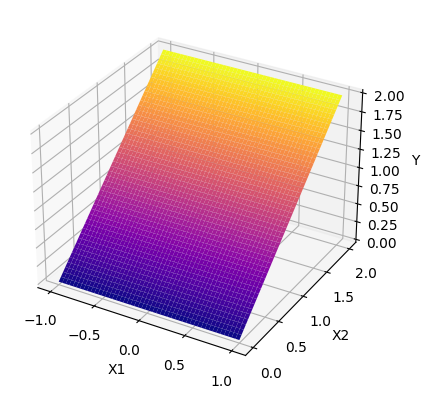

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, yout.data.numpy().reshape(X1.shape), cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [40]:
## modified dot product
### decrease magnitude if projection mag > 1

yout = xx@vector.t()
mask = yout > 1
yout[mask] = 2-yout[mask]

/tmp/ipykernel_2541832/1835141851.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


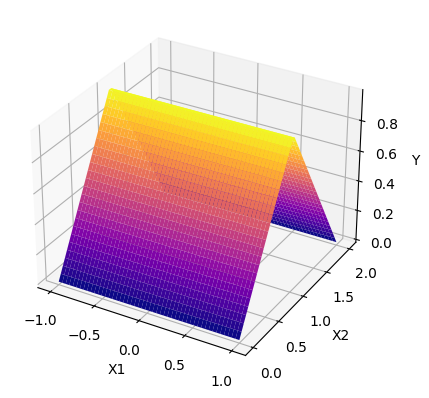

In [41]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, yout.data.numpy().reshape(X1.shape), cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
# plt.pause(5)

In [42]:
## modified dot product
### previous + decrease magnitude difference

mags = torch.norm(xx, p=2, dim=1).pow(3)
mags.shape

torch.Size([2500])

## Method 1

In [43]:
yout = xx@vector.t()*2
mask = yout > 1
yout[mask] = 1-(yout[mask]-1)*0.5

# yout -= mags.reshape(yout.shape)*0.5
yout = (1.0)*yout + (-1.0)*mags.reshape(yout.shape)
### plot this seperately

## Method 2

In [44]:
# ### plot this seperately
# mags = torch.norm(xx, p=2, dim=1).pow(3)
# yout = (xx)@vector.t()
# yout = (1.0)*yout + (-1.0)*mags.reshape(yout.shape)

## Plot

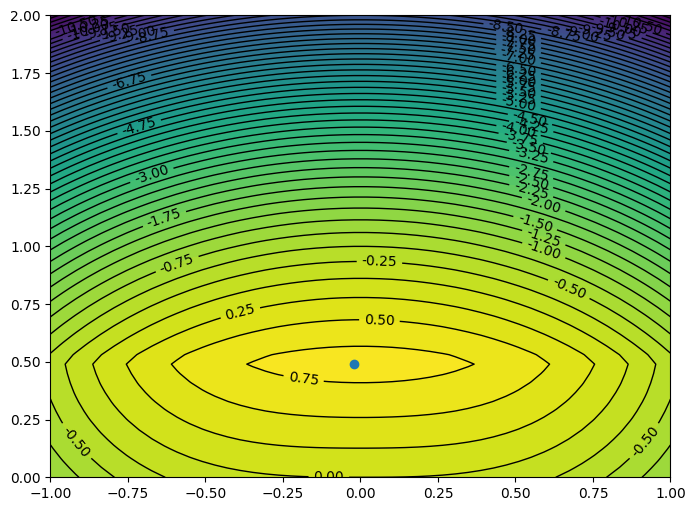

In [45]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.contourf(X1, X2, yout.data.numpy().reshape(Y.shape), levels=50)
cs = plt.contour(X1, X2, yout.data.numpy().reshape(Y.shape), levels=50, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")

xx_max = xx[yout.argmax()]
plt.scatter(*xx_max)

In [46]:
xx[yout.argmax()]

tensor([-0.0204,  0.4898])

/tmp/ipykernel_2541832/3850398794.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


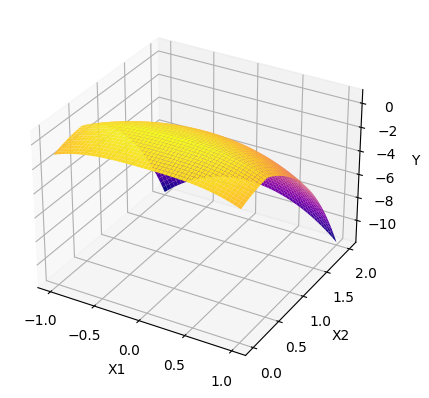

In [47]:
%matplotlib inline
fig = plt.figure()
# [xx_max[0]][xx_max[0]]
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, yout.data.numpy().reshape(X1.shape), cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
# plt.pause(10)

## Create forward (on-xaxis) moving function

In [48]:
### x[-1,1] y[0,2] cent (-0.5, 1)
# xx.shape

torch.Size([2500, 2])

In [200]:
point = torch.Tensor([[-0.5, 1]])
point.shape

torch.Size([1, 2])

In [201]:
### direction towards +ve x-axis
direction = torch.Tensor([[1, 0]]) ## always normalized

In [220]:
vecs = xx-point
vecs_mag = torch.norm(vecs, p=1.5, dim=1, keepdim=True)
vecs_mag.shape

torch.Size([2500, 1])

In [221]:
vecs_dirn = vecs/(vecs_mag+1e-11)

## Distance 1

In [226]:
yout = vecs_dirn@direction.t() ## gives importance to direction

yout = yout/(vecs_mag+1e-11)

## reduce output variance
yout = (yout.abs() ** (1/10)) #*yout.sign()

## Plot

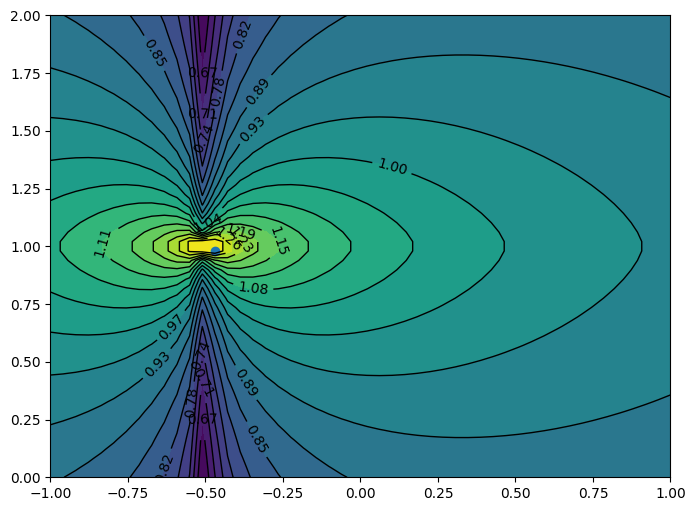

In [227]:
%matplotlib inline
LVLs = np.linspace(yout.min(), yout.max(), 20)
plt.figure(figsize=(8,6))
plt.contourf(X1, X2, yout.data.numpy().reshape(Y.shape), levels=LVLs)
cs = plt.contour(X1, X2, yout.data.numpy().reshape(Y.shape), levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")

xx_max = xx[yout.abs().argmax()]
plt.scatter(*xx_max)

In [199]:
xx[yout.abs().argmax()]

tensor([-0.4694,  0.9796])